Question 1:

Iteration 1: Price (w) = 21.0, Revenue Loss = -309.5
Iteration 2: Price (w) = 22.8, Revenue Loss = -324.08
Iteration 3: Price (w) = 25.14, Revenue Loss = -338.1902
Iteration 4: Price (w) = 27.732, Revenue Loss = -347.42808800000006
Iteration 5: Price (w) = 30.2916, Revenue Loss = -349.95748471999997


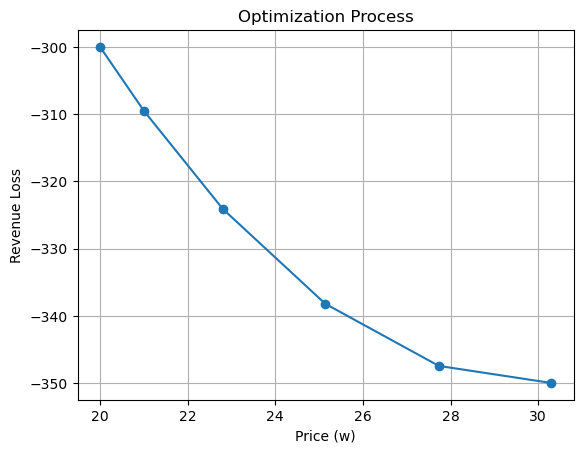

Optimal Price (w): 30.2916
Minimum Revenue Loss: -349.95748471999997


In [6]:
import matplotlib.pyplot as plt

def revenue_loss(w):
    return 0.5 * w**2 - 30 * w + 100

def gradient(w):
    return w - 30

def momentum_optimization(learning_rate, momentum, initial_w, iterations):
    w = initial_w
    velocity = 0
    w_values = [w]
    loss_values = [revenue_loss(w)]
    for i in range(iterations):
        grad = gradient(w)
        velocity = momentum * velocity - learning_rate * grad
        w = w + velocity
        w_values.append(w)
        loss_values.append(revenue_loss(w))
        print(f"Iteration {i+1}: Price (w) = {w}, Revenue Loss = {loss_values[-1]}")
    return w_values, loss_values

# Parameters
learning_rate = 0.1
momentum = 0.9
initial_w = 20
iterations = 5

# Perform momentum-based optimization
w_values, loss_values = momentum_optimization(learning_rate, momentum, initial_w, iterations)

# Plot the optimization process
plt.plot(w_values, loss_values, marker='o', linestyle='-')
plt.title('Optimization Process')
plt.xlabel('Price (w)')
plt.ylabel('Revenue Loss')
plt.grid(True)
plt.show()

# Print the optimal value
optimal_w = w_values[-1]
optimal_loss = loss_values[-1]
print(f"Optimal Price (w): {optimal_w}")
print(f"Minimum Revenue Loss: {optimal_loss}")

In [ ]:
Question 2:

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Step 1: Load and Preprocess the Dataset
df = pd.read_csv('/home/administrator/Documents/PROGRAMMING/ML/Datasets/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
df.isnull().sum() #check for missing values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [13]:
df.shape

(299, 13)

In [14]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [17]:
x = df.drop(columns='DEATH_EVENT', axis=1)
y = df[['DEATH_EVENT']]

In [20]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(x, y)

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
# Step 3: Build the Neural Network Model
def create_model(regularization):
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=regularization),
        Dropout(0.5),
        Dense(32, activation='relu', kernel_regularizer=regularization),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

In [37]:
# Step 4: Implement Regularization Techniques
# Define regularization strengths
alpha_l1 = 0.01
alpha_l2 = 0.01
alpha_l1_l2 = 0.01

In [38]:
# Create models with different regularization techniques
model_l1 = create_model(l1(alpha_l1))
model_l2 = create_model(l2(alpha_l2))
model_l1_l2 = create_model(l1_l2(alpha_l1_l2))

In [41]:
# Step 5: Train the Models
models = {'L1 Regularization': model_l1, 'L2 Regularization': model_l2, 'Elastic Net Regularization': model_l1_l2}
history = {}
for name, model in models.items():
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history[name] = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=0)

In [44]:
# Step 6: Evaluate the Models
metrics = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

3/3 [==============================] - 0s 2ms/step


/home/administrator/.local/share/anaconda3/envs/deeplearning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/administrator/.local/share/anaconda3/envs/deeplearning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


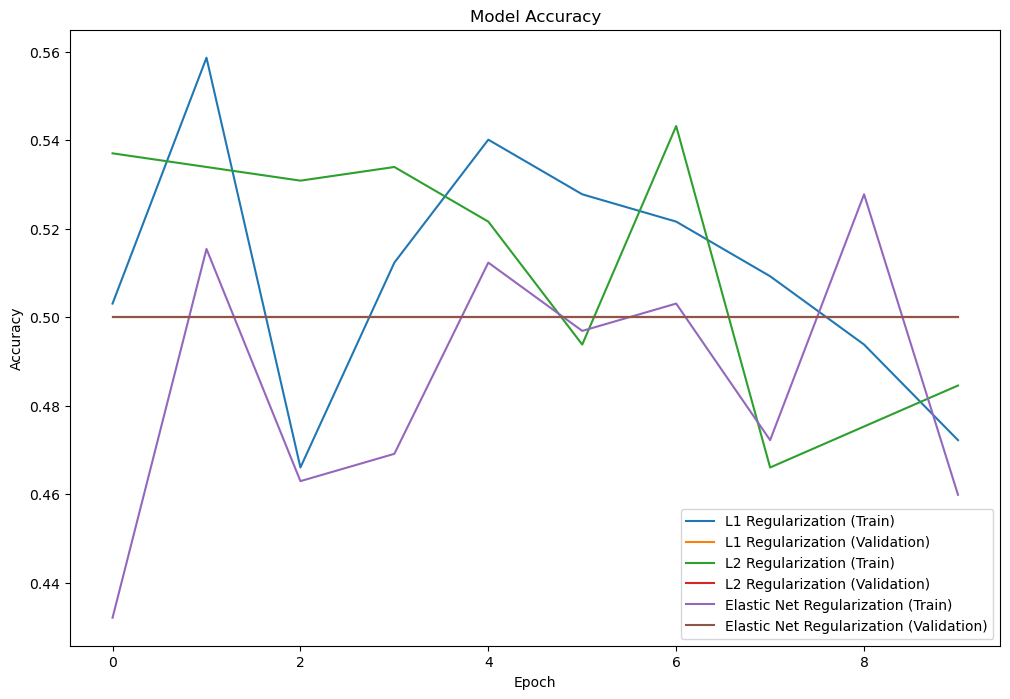

In [45]:
# Step 7: Results Visualization and Interpretation
# Plot learning curves
plt.figure(figsize=(12, 8))
for name, history in history.items():
    plt.plot(history.history['accuracy'], label=f'{name} (Train)')
    plt.plot(history.history['val_accuracy'], label=f'{name} (Validation)')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 0s 8ms/step


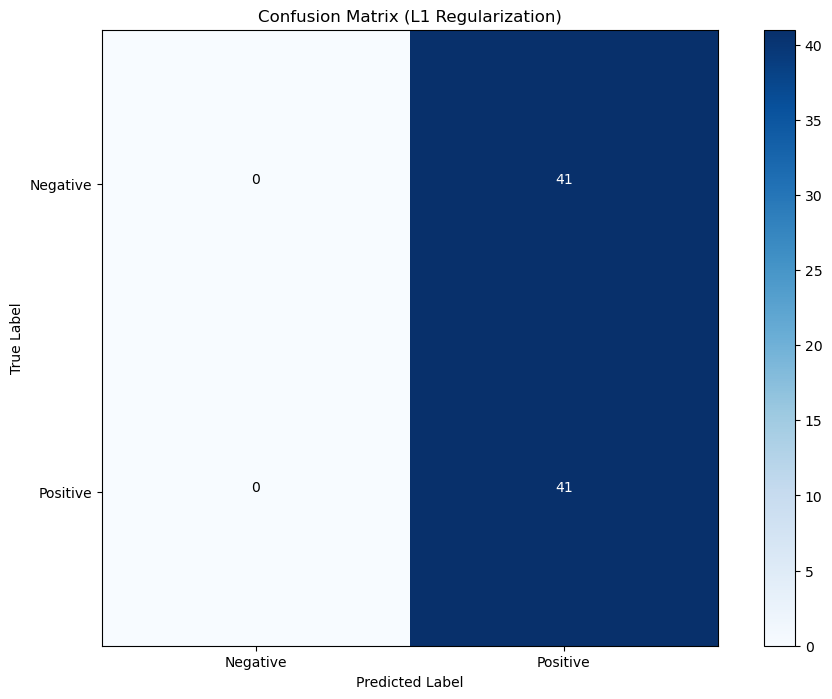

3/3 [==============================] - 0s 4ms/step


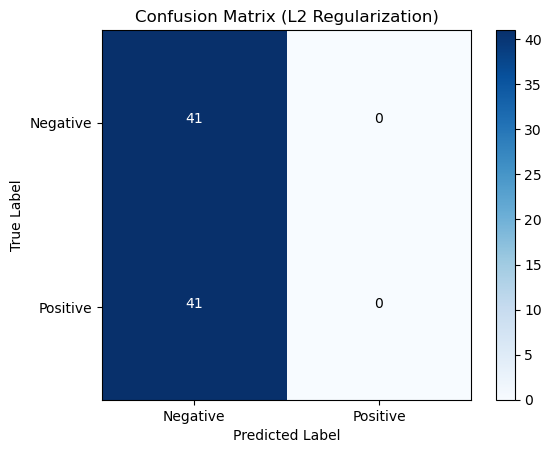

3/3 [==============================] - 0s 6ms/step


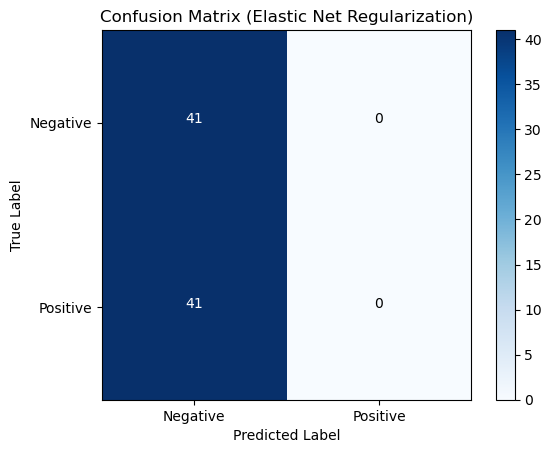

In [48]:
# Calculate and plot confusion matrices
plt.figure(figsize=(12, 8))
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({name})')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(np.arange(2), labels=['Negative', 'Positive'])
    plt.yticks(np.arange(2), labels=['Negative', 'Positive'])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.show()

3/3 [==============================] - 0s 6ms/step


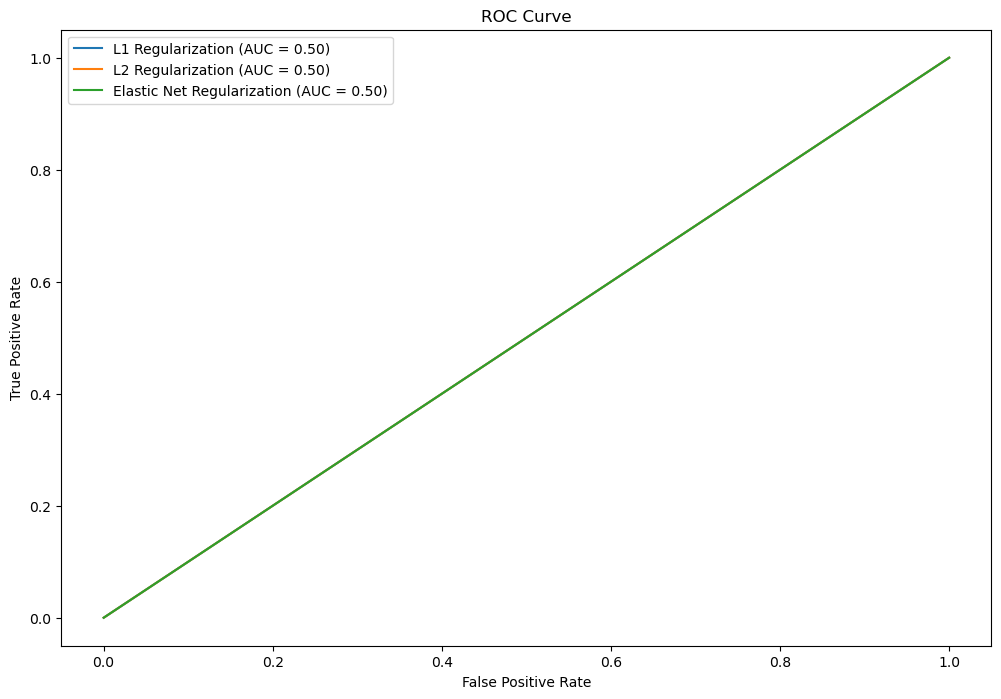

Model: L1 Regularization
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666

Model: L2 Regularization
Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Model: Elastic Net Regularization
Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0



In [51]:
# Calculate and plot ROC curves
plt.figure(figsize=(12, 8))
for name, model in models.items():
    y_prob = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
    auc = roc_auc_score(Y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Print evaluation metrics
for name, metric in metrics.items():
    print(f'Model: {name}')
    for metric_name, value in metric.items():
        print(f'{metric_name}: {value}')
    print()